In [1]:
%pylab inline
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
uber_data = pd.read_csv('C:/Users/Dell/Downloads/archive/uber-raw-data-aug14.csv')

In [3]:
uber_data.head()

,Date/Time,Lat,Lon,Base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512


In [4]:
uber_data['Date/Time']=uber_data['Date/Time'].map(pd.to_datetime)

In [5]:
uber_data.head()

,Date/Time,Lat,Lon,Base
0,2014-08-01 00:03:00,40.7366,-73.9906,B02512
1,2014-08-01 00:09:00,40.7260,-73.9918,B02512
2,2014-08-01 00:12:00,40.7209,-74.0507,B02512
3,2014-08-01 00:12:00,40.7387,-73.9856,B02512
4,2014-08-01 00:12:00,40.7323,-74.0077,B02512


In [6]:
uber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829275 entries, 0 to 829274
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date/Time  829275 non-null  datetime64[ns]
 1   Lat        829275 non-null  float64       
 2   Lon        829275 non-null  float64       
 3   Base       829275 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 25.3+ MB


In [7]:
uber_data['Day'] = uber_data['Date/Time'].apply(lambda x: x.day)

In [8]:
uber_data['WeekDay'] = uber_data['Date/Time'].apply(lambda x: x.weekday())

In [9]:
uber_data['hour'] = uber_data['Date/Time'].apply(lambda x: x.hour)

In [10]:
uber_data.tail()

,Date/Time,Lat,Lon,Base,Day,WeekDay,hour
829270,2014-08-31 23:55:00,40.7552,-73.9753,B02764,31,6,23
829271,2014-08-31 23:55:00,40.7552,-73.9753,B02764,31,6,23
829272,2014-08-31 23:55:00,40.7617,-73.9788,B02764,31,6,23
829273,2014-08-31 23:59:00,40.7395,-73.9889,B02764,31,6,23
829274,2014-08-31 23:59:00,40.7270,-73.9802,B02764,31,6,23


Text(0.5, 1.0, 'Uber - Daily Frequency - Aug 2014')

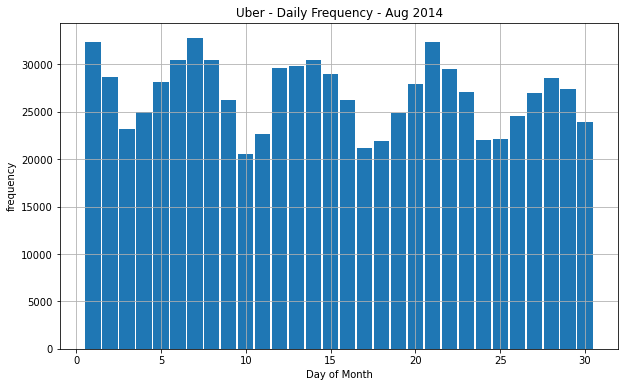

In [11]:
plt.figure(figsize=(10,6))
uber_data['Day'].hist(bins=30,rwidth=0.9,range=(0.5,30.5))
plt.xlabel('Day of Month')
plt.ylabel('frequency')
plt.title('Uber - Daily Frequency - Aug 2014')

In [12]:
for x,rows in uber_data.groupby('Day'):
    print((x,len(rows)))

(1, 32353)
(2, 28678)
(3, 23146)
(4, 24952)
(5, 28094)
(6, 30495)
(7, 32759)
(8, 30411)
(9, 26286)
(10, 20584)
(11, 22632)
(12, 29646)
(13, 29788)
(14, 30457)
(15, 28974)
(16, 26234)
(17, 21209)
(18, 21956)
(19, 24834)
(20, 27955)
(21, 32304)
(22, 29512)
(23, 27097)
(24, 22036)
(25, 22093)
(26, 24550)
(27, 27018)
(28, 28597)
(29, 27424)
(30, 23930)
(31, 23271)


In [13]:
by_date = uber_data.groupby('Day').apply(lambda x: len(x))

In [14]:
by_date

Day
1     32353
2     28678
3     23146
4     24952
5     28094
6     30495
7     32759
8     30411
9     26286
10    20584
11    22632
12    29646
13    29788
14    30457
15    28974
16    26234
17    21209
18    21956
19    24834
20    27955
21    32304
22    29512
23    27097
24    22036
25    22093
26    24550
27    27018
28    28597
29    27424
30    23930
31    23271
dtype: int64

<AxesSubplot:xlabel='Day'>

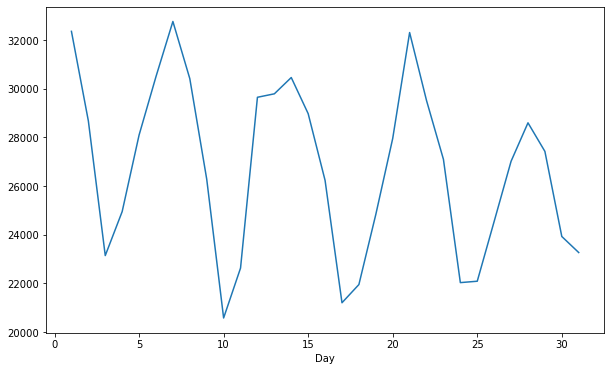

In [15]:
plt.figure(figsize=(10,6))
by_date.plot()

In [16]:
by_date_sorted= by_date.sort_values()
by_date_sorted

Day
10    20584
17    21209
18    21956
24    22036
25    22093
11    22632
3     23146
31    23271
30    23930
26    24550
19    24834
4     24952
16    26234
9     26286
27    27018
23    27097
29    27424
20    27955
5     28094
28    28597
2     28678
15    28974
22    29512
12    29646
13    29788
8     30411
14    30457
6     30495
21    32304
1     32353
7     32759
dtype: int64

<AxesSubplot:>

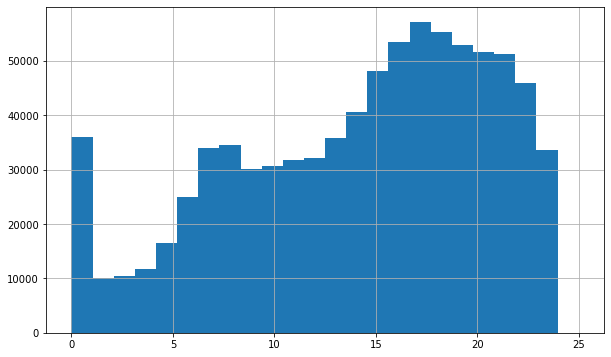

In [18]:
plt.figure(figsize=(10,6))

uber_data.hour.hist(bins=24, range=(0,25))

([<matplotlib.axis.XTick at 0x1f3811e7820>,
 [Text(0, 0, '2'),
  Text(1, 0, '3'),
  Text(2, 0, '4'),
  Text(3, 0, '1'),
  Text(4, 0, '5'),
  Text(5, 0, '0'),
  Text(6, 0, '6'),
  Text(7, 0, '9'),
  Text(8, 0, '10'),
  Text(9, 0, '11'),
  Text(10, 0, '12'),
  Text(11, 0, '23'),
  Text(12, 0, '7'),
  Text(13, 0, '8'),
  Text(14, 0, '13'),
  Text(15, 0, '14'),
  Text(16, 0, '22'),
  Text(17, 0, '15'),
  Text(18, 0, '21'),
  Text(19, 0, '20'),
  Text(20, 0, '19'),
  Text(21, 0, '16'),
  Text(22, 0, '18'),
  Text(23, 0, '17')])

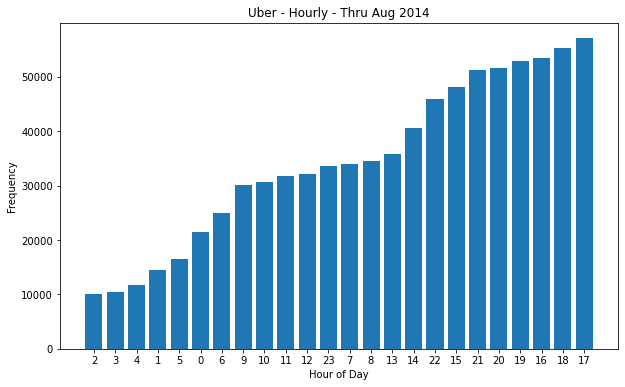

In [19]:
by_hour = uber_data.groupby('hour').apply(lambda x: len(x))
by_hour_sorted = by_hour.sort_values()


plt.figure(figsize=(10,6))
bar(range(0,24),by_hour_sorted)
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.title('Uber - Hourly - Thru Aug 2014')
xticks(range(0,24),by_hour_sorted.index)

([<matplotlib.axis.XTick at 0x1f3812aaeb0>,
 [Text(0, 0, 'Mon'),
  Text(1, 0, 'Tue'),
  Text(2, 0, 'Wed'),
  Text(3, 0, 'Thu'),
  Text(4, 0, 'Fri'),
  Text(5, 0, 'Sat'),
  Text(6, 0, 'Sun')])

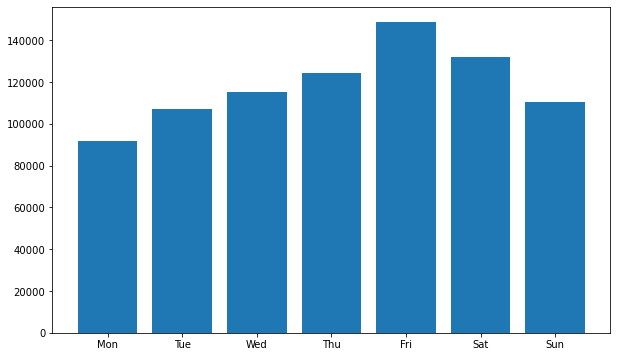

In [20]:
plt.figure(figsize=(10,6))

hist(uber_data.WeekDay, bins=7,range=(-0.5,6.5),rwidth=0.8)
xticks(range(7),['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

In [21]:
by_hour_week = uber_data.groupby(['WeekDay','hour']).apply(lambda x: len(x))

by_hour_weeek = by_hour_week.unstack()



by_hour_weeek

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
WeekDay,,,,,,,,,,,,,,,,,,,,,
0,1094,684,560,1186,1836,2786,4098,5357,5060,3844,...,4572,5251,5974,6508,6135,5773,5586,4775,3559,2178
1,1115,733,508,772,1337,2270,3975,5614,5350,4196,...,5501,6361,7426,8297,7999,7273,7300,6630,4951,2903
2,1649,967,665,967,1483,2611,4546,6161,5955,4575,...,5312,6495,7682,8520,7904,7507,7736,7623,5602,3305
3,1800,1055,745,1099,1633,2497,4069,5690,5454,4536,...,5809,6936,7818,8592,8563,8512,8549,8762,8063,5736
4,3536,2064,1331,1660,2162,3101,4651,6601,6753,5512,...,7197,8803,9401,9655,9484,9227,8321,9075,9488,8056
5,5828,4209,2857,2293,1793,1801,2089,2541,3228,3863,...,6276,7478,7884,8291,8846,8521,8192,8830,9506,8166
6,6429,4759,3439,2399,1530,1459,1479,2100,2766,3669,...,5977,6873,7296,7259,6459,6195,5990,5659,4839,3265


<AxesSubplot:xlabel='hour', ylabel='WeekDay'>

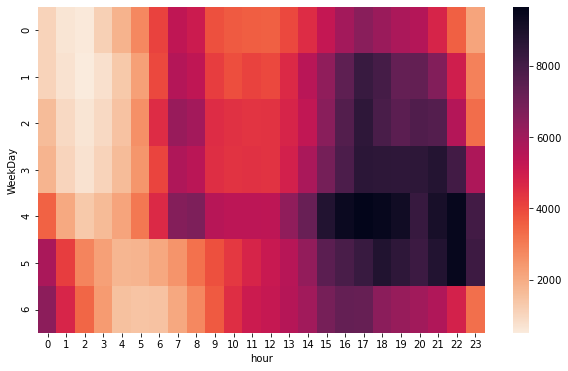

In [22]:
plt.figure(figsize=(10,6))

cmap = sns.cm.rocket_r

sns.heatmap(by_hour_weeek, annot=False, cmap=cmap)

In [23]:
print(uber_data['Lon'].max())
print(uber_data['Lon'].min())
print(uber_data['Lat'].max())
print(uber_data['Lat'].min())

-72.3359
-74.7737
41.3182
39.6569


(40.7, 41.0)

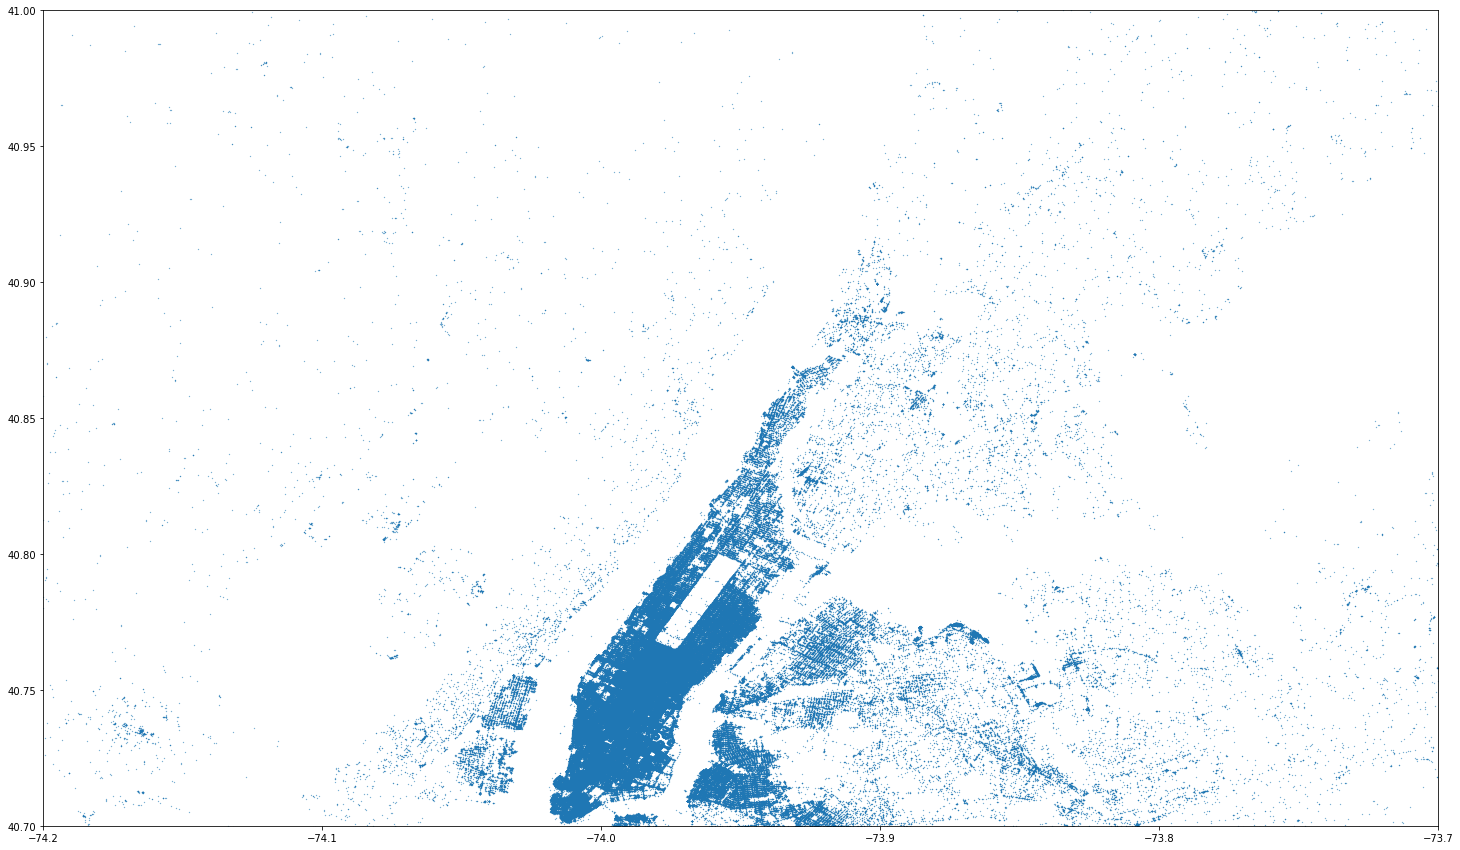

In [24]:
plt.figure(figsize=(25,15))


plot(uber_data['Lon'], uber_data['Lat'], '.', ms=0.5)
xlim(-74.2, -73.7)
ylim(40.7,41)